In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [ ]:
df = pd.read_csv('/content/train.csv')
df

,id,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,0,15674932,Okwudilichukwu,668,France,Male,33.0,3,0.00,2,1.0,0.0,181449.97,0
1,1,15749177,Okwudiliolisa,627,France,Male,33.0,1,0.00,2,1.0,1.0,49503.50,0
2,2,15694510,Hsueh,678,France,Male,40.0,10,0.00,2,1.0,0.0,184866.69,0
3,3,15741417,Kao,581,France,Male,34.0,2,148882.54,1,1.0,1.0,84560.88,0
4,4,15766172,Chiemenam,716,Spain,Male,33.0,5,0.00,2,1.0,1.0,15068.83,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
165029,165029,15667085,Meng,667,Spain,Female,33.0,2,0.00,1,1.0,1.0,131834.75,0
165030,165030,15665521,Okechukwu,792,France,Male,35.0,3,0.00,1,0.0,0.0,131834.45,0
165031,165031,15664752,Hsia,565,France,Male,31.0,5,0.00,1,1.0,1.0,127429.56,0
165032,165032,15689614,Hsiung,554,Spain,Female,30.0,7,161533.00,1,0.0,1.0,71173.03,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 165034 entries, 0 to 165033
Data columns (total 14 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   id               165034 non-null  int64  
 1   CustomerId       165034 non-null  int64  
 2   Surname          165034 non-null  object 
 3   CreditScore      165034 non-null  int64  
 4   Geography        165034 non-null  object 
 5   Gender           165034 non-null  object 
 6   Age              165034 non-null  float64
 7   Tenure           165034 non-null  int64  
 8   Balance          165034 non-null  float64
 9   NumOfProducts    165034 non-null  int64  
 10  HasCrCard        165034 non-null  float64
 11  IsActiveMember   165034 non-null  float64
 12  EstimatedSalary  165034 non-null  float64
 13  Exited           165034 non-null  int64  
dtypes: float64(5), int64(6), object(3)
memory usage: 17.6+ MB


In [ ]:
df.isna().sum()

,0
id,0
CustomerId,0
Surname,0
CreditScore,0
Geography,0
Gender,0
Age,0
Tenure,0
Balance,0
NumOfProducts,0


In [ ]:
df.describe()

,id,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,165034.0000,1.650340e+05,165034.000000,165034.000000,165034.000000,165034.000000,165034.000000,165034.000000,165034.000000,165034.000000,165034.000000
mean,82516.5000,1.569201e+07,656.454373,38.125888,5.020353,55478.086689,1.554455,0.753954,0.497770,112574.822734,0.211599
std,47641.3565,7.139782e+04,80.103340,8.867205,2.806159,62817.663278,0.547154,0.430707,0.499997,50292.865585,0.408443
min,0.0000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.000000,0.000000,11.580000,0.000000
25%,41258.2500,1.563314e+07,597.000000,32.000000,3.000000,0.000000,1.000000,1.000000,0.000000,74637.570000,0.000000
50%,82516.5000,1.569017e+07,659.000000,37.000000,5.000000,0.000000,2.000000,1.000000,0.000000,117948.000000,0.000000
75%,123774.7500,1.575682e+07,710.000000,42.000000,7.000000,119939.517500,2.000000,1.000000,1.000000,155152.467500,0.000000
max,165033.0000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.000000,1.000000,199992.480000,1.000000


<Axes: xlabel='IsActiveMember', ylabel='Density'>

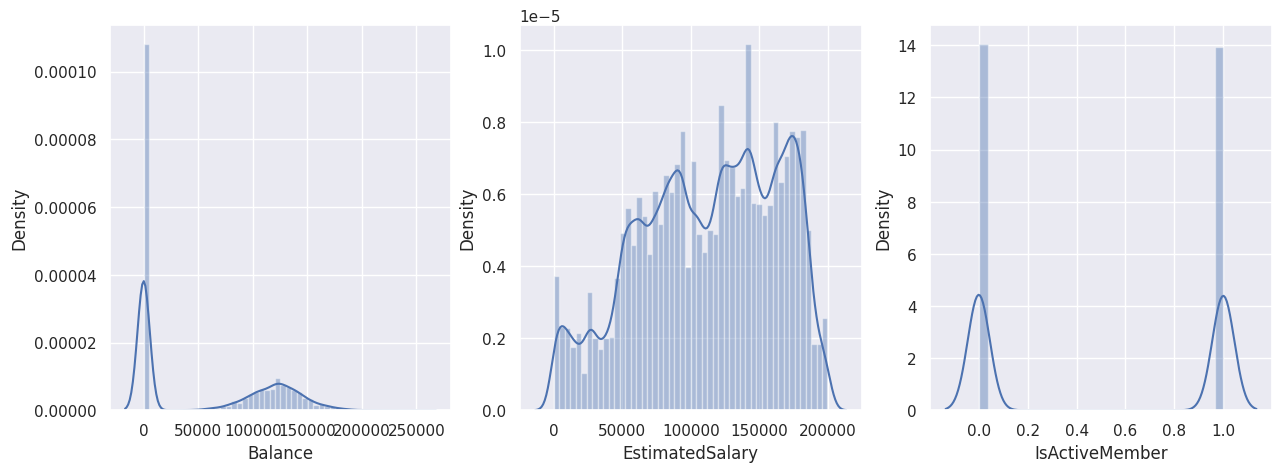

In [ ]:
# Balance ,isactive member, estimated salary
sns.set()
fig,ax = plt.subplots(1,3,figsize=(15,5))
sns.distplot(df['Balance'],ax=ax[0])
sns.distplot(df['EstimatedSalary'],ax=ax[1])
sns.distplot(df['IsActiveMember'],ax=ax[2])

In [ ]:
# prompt: use target encoder in 'Surname' column and create a new column 'Sur_te' and drop 'Surname' column

!pip install category_encoders

import category_encoders as ce

# create target encoder object
target_encoder = ce.TargetEncoder(cols=['Surname'])

# fit and transform the 'Surname' column
df['Sur_te'] = target_encoder.fit_transform(df['Surname'], df['Exited'])

# drop the original 'Surname' column
df = df.drop('Surname', axis=1)

df.head()

,id,CustomerId,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Sur_te
0,0,15674932,668,France,Male,33.0,3,0.00,2,1.0,0.0,181449.97,0,0.318008
1,1,15749177,627,France,Male,33.0,1,0.00,2,1.0,1.0,49503.50,0,0.326667
2,2,15694510,678,France,Male,40.0,10,0.00,2,1.0,0.0,184866.69,0,0.222052
3,3,15741417,581,France,Male,34.0,2,148882.54,1,1.0,1.0,84560.88,0,0.181991
4,4,15766172,716,Spain,Male,33.0,5,0.00,2,1.0,1.0,15068.83,0,0.146341


In [ ]:
# # prompt: Target encoding can be used when dealing with categorical variables of high cardinality. The Surname column has 2797 different values. We encode it with the mean of the target variable for its level.

# # Encode Surname
# df['Surname_Encoded'] = df.groupby('Surname')['Exited'].transform('mean')
# df.drop('Surname', axis=1, inplace=True)

<Axes: ylabel='IsActiveMember'>

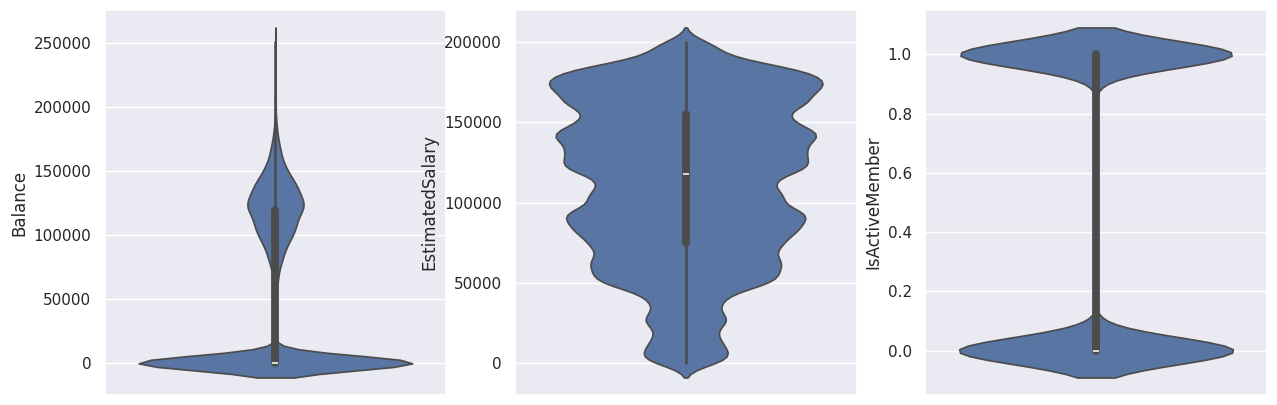

In [ ]:
# Balance ,isactive member, estimated salary
fig,ax = plt.subplots(1,3,figsize=(15,5))
sns.violinplot(df['Balance'],ax=ax[0])
sns.violinplot(df['EstimatedSalary'],ax=ax[1])
sns.violinplot(df['IsActiveMember'],ax=ax[2])

In [ ]:
lower = df['Balance'].quantile(0.01)
upper = df['Balance'].quantile(0.99)

df = df[(df['Balance'] >= lower) & (df['Balance'] <= upper)]

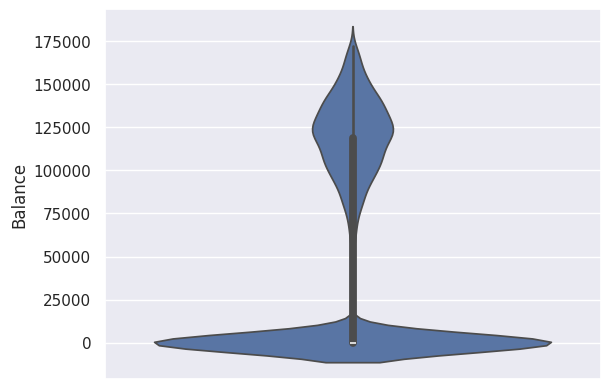

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.violinplot(y=df['Balance'])  # Or df['Balance_winsorized']
plt.show()

In [ ]:
df1 = df.drop(['id','CustomerId'],axis=1)

In [ ]:
df1

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Sur_te
0,668,France,Male,33.0,3,0.00,2,1.0,0.0,181449.97,0,0.318008
1,627,France,Male,33.0,1,0.00,2,1.0,1.0,49503.50,0,0.326667
2,678,France,Male,40.0,10,0.00,2,1.0,0.0,184866.69,0,0.222052
3,581,France,Male,34.0,2,148882.54,1,1.0,1.0,84560.88,0,0.181991
4,716,Spain,Male,33.0,5,0.00,2,1.0,1.0,15068.83,0,0.146341
...,...,...,...,...,...,...,...,...,...,...,...,...
165029,667,Spain,Female,33.0,2,0.00,1,1.0,1.0,131834.75,0,0.245774
165030,792,France,Male,35.0,3,0.00,1,0.0,0.0,131834.45,0,0.217252
165031,565,France,Male,31.0,5,0.00,1,1.0,1.0,127429.56,0,0.209283
165032,554,Spain,Female,30.0,7,161533.00,1,0.0,1.0,71173.03,0,0.229757


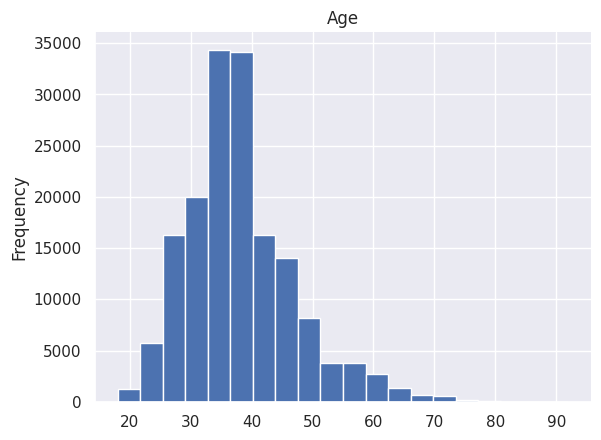

In [ ]:
df1['Age'].plot(kind='hist', bins=20, title='Age')
plt.gca().spines[['top', 'right',]].set_visible(False)

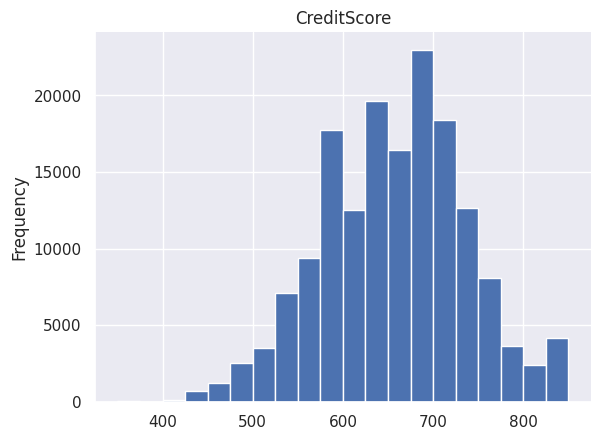

In [ ]:
df1['CreditScore'].plot(kind='hist', bins=20, title='CreditScore')
plt.gca().spines[['top', 'right',]].set_visible(False)

In [ ]:
df['Geography'].nunique()

3

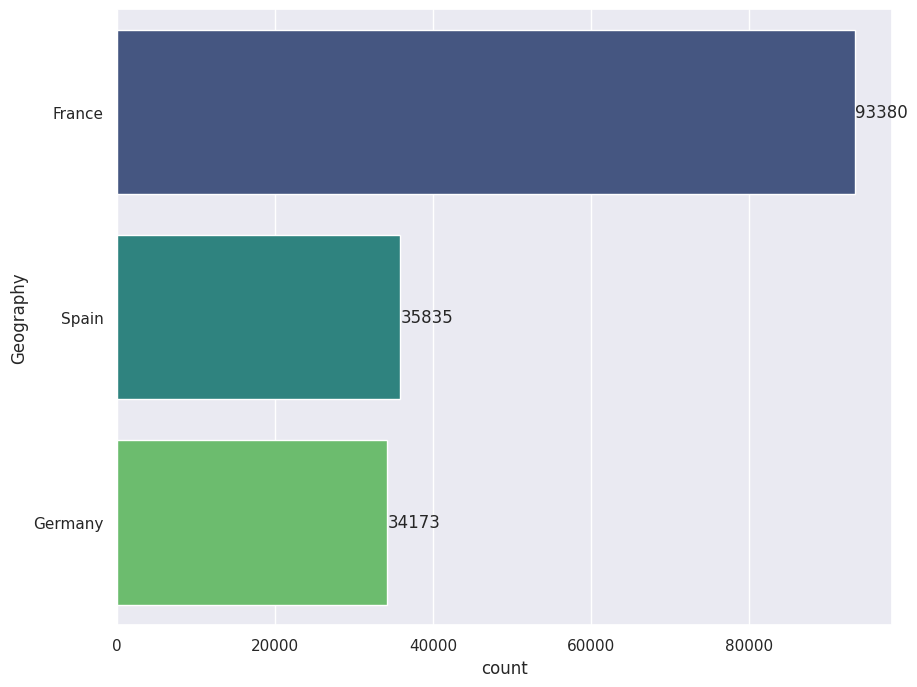

In [ ]:
plt.figure(figsize=(10,8))
ax = sns.countplot(df['Geography'],palette='viridis')
for container in ax.containers:
  ax.bar_label(container)
plt.show()

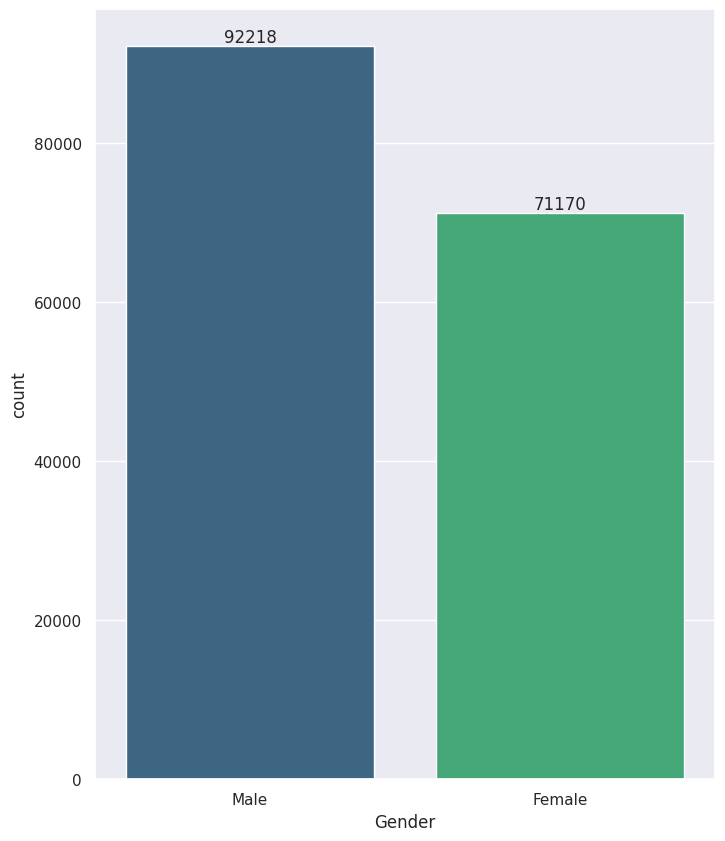

In [ ]:
plt.figure(figsize=(8,10))
ax = sns.countplot(df,x='Gender',palette='viridis')
for container in ax.containers:
  ax.bar_label(container)
plt.show()

In [ ]:
import pandas as pd
df1_final = pd.get_dummies(df1, columns=['Geography', 'Gender'])

In [ ]:
df1_final

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Sur_te,Geography_France,Geography_Germany,Geography_Spain,Gender_Female,Gender_Male
0,668,33.0,3,0.00,2,1.0,0.0,181449.97,0,0.318008,True,False,False,False,True
1,627,33.0,1,0.00,2,1.0,1.0,49503.50,0,0.326667,True,False,False,False,True
2,678,40.0,10,0.00,2,1.0,0.0,184866.69,0,0.222052,True,False,False,False,True
3,581,34.0,2,148882.54,1,1.0,1.0,84560.88,0,0.181991,True,False,False,False,True
4,716,33.0,5,0.00,2,1.0,1.0,15068.83,0,0.146341,False,False,True,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
165029,667,33.0,2,0.00,1,1.0,1.0,131834.75,0,0.245774,False,False,True,True,False
165030,792,35.0,3,0.00,1,0.0,0.0,131834.45,0,0.217252,True,False,False,False,True
165031,565,31.0,5,0.00,1,1.0,1.0,127429.56,0,0.209283,True,False,False,False,True
165032,554,30.0,7,161533.00,1,0.0,1.0,71173.03,0,0.229757,False,False,True,True,False


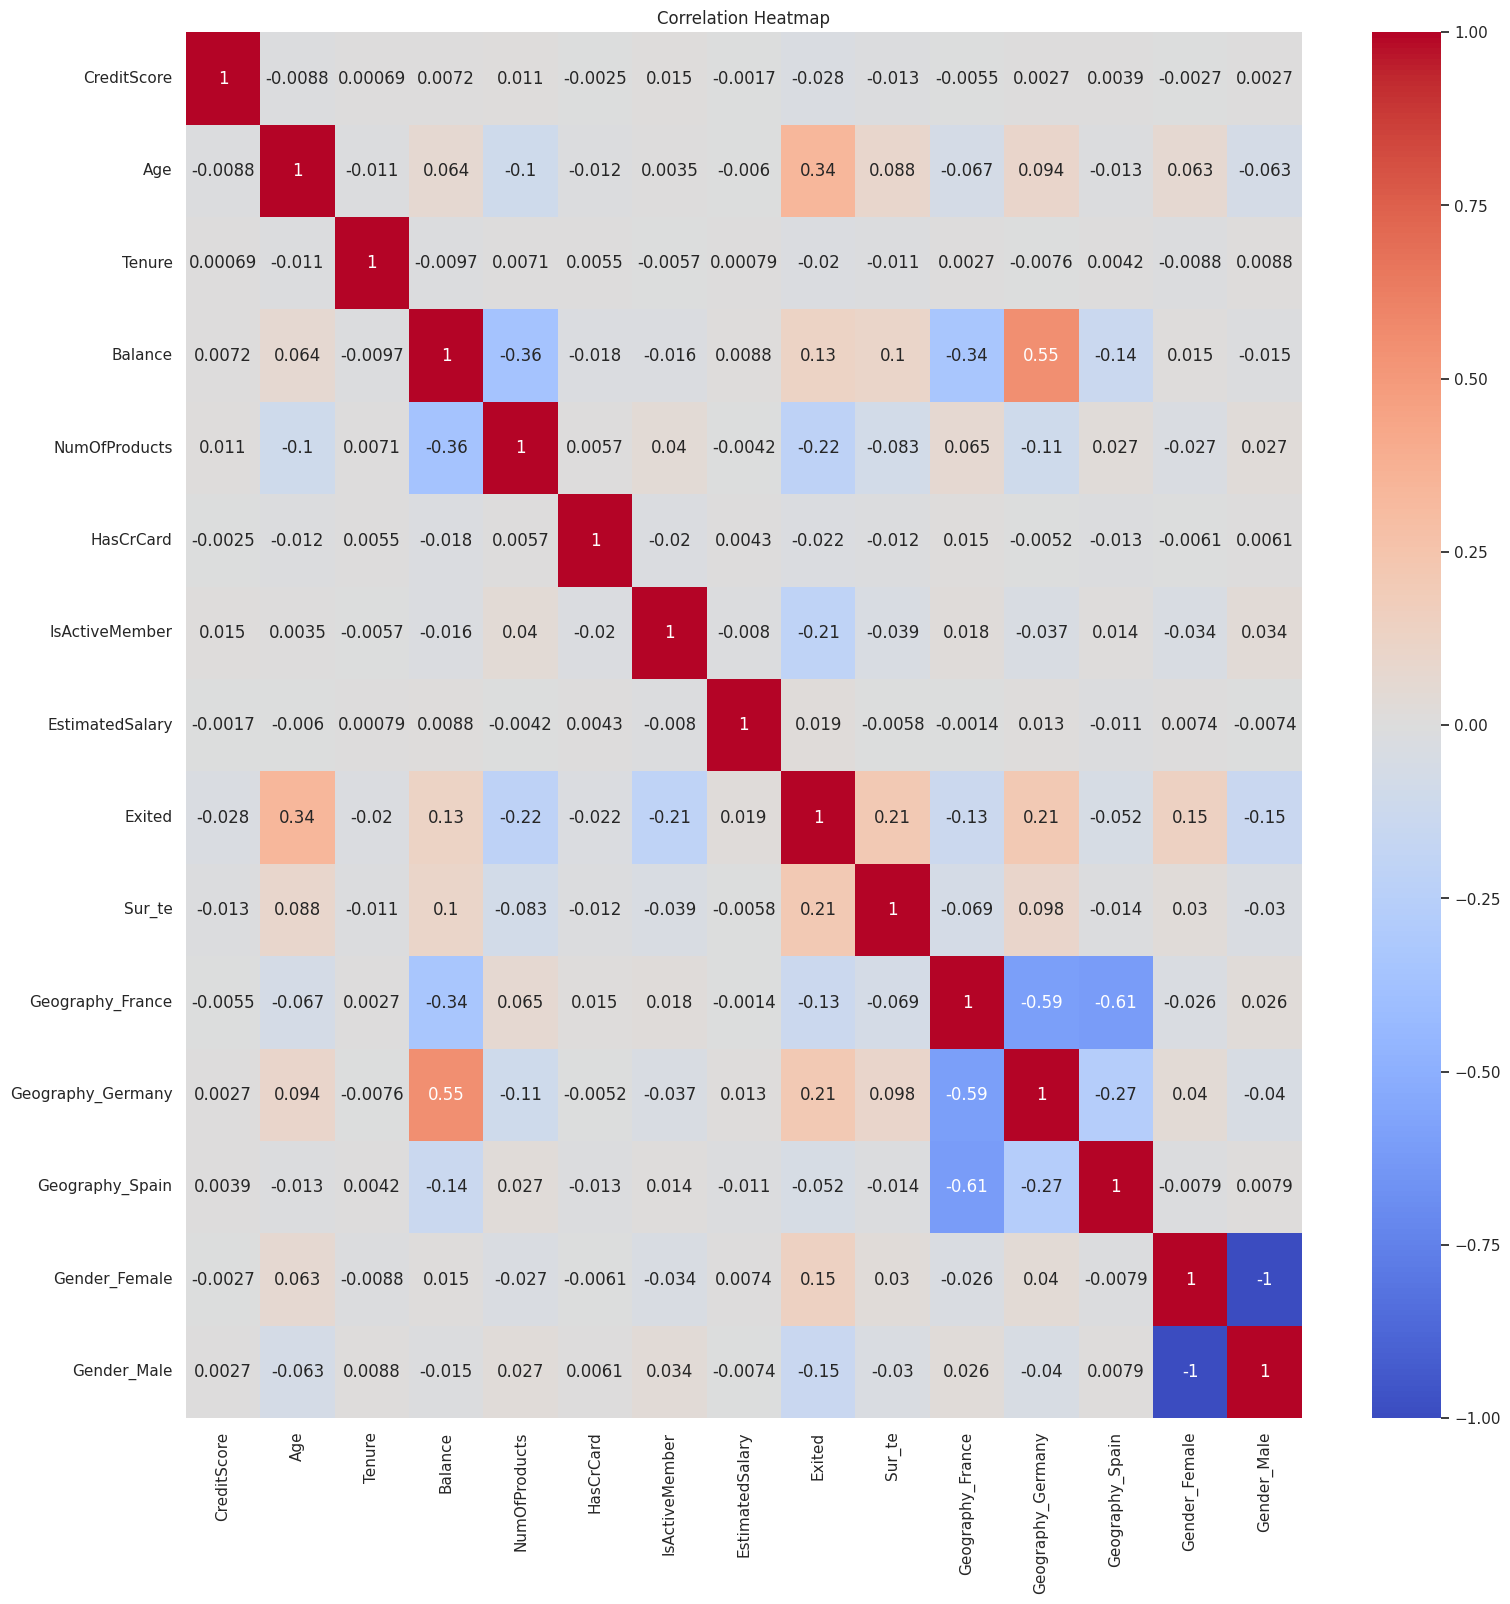

In [ ]:
plt.figure(figsize=(18, 18))
import matplotlib.pyplot as plt
sns.heatmap(df1_final.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

In [ ]:
df1_final.describe()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Sur_te
count,163388.000000,163388.000000,163388.000000,163388.000000,163388.000000,163388.000000,163388.000000,163388.000000,163388.000000,163388.000000
mean,656.457163,38.119708,5.020479,54194.726744,1.556491,0.754199,0.497607,112573.451441,0.211160,0.211209
std,80.047578,8.862834,2.805882,61802.940142,0.546623,0.430563,0.499996,50281.024400,0.408133,0.079395
min,350.000000,18.000000,0.000000,0.000000,1.000000,0.000000,0.000000,11.580000,0.000000,0.017107
25%,597.000000,32.000000,3.000000,0.000000,1.000000,1.000000,0.000000,74692.060000,0.000000,0.164251
50%,659.000000,37.000000,5.000000,0.000000,2.000000,1.000000,0.000000,117948.000000,0.000000,0.204553
75%,710.000000,42.000000,7.000000,118627.812500,2.000000,1.000000,1.000000,155049.225000,0.000000,0.247012
max,850.000000,92.000000,10.000000,172325.670000,4.000000,1.000000,1.000000,199992.480000,1.000000,0.758730


In [ ]:
X = df1_final.drop('Exited',axis=1)
y = df1_final['Exited']

# **Test_data**

In [ ]:
test = pd.read_csv('/content/test.csv')
test

,id,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,165034,15773898,Lucchese,586,France,Female,23.0,2,0.00,2,0.0,1.0,160976.75
1,165035,15782418,Nott,683,France,Female,46.0,2,0.00,1,1.0,0.0,72549.27
2,165036,15807120,K?,656,France,Female,34.0,7,0.00,2,1.0,0.0,138882.09
3,165037,15808905,O'Donnell,681,France,Male,36.0,8,0.00,1,1.0,0.0,113931.57
4,165038,15607314,Higgins,752,Germany,Male,38.0,10,121263.62,1,1.0,0.0,139431.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...
110018,275052,15662091,P'eng,570,Spain,Male,29.0,7,116099.82,1,1.0,1.0,148087.62
110019,275053,15774133,Cox,575,France,Female,36.0,4,178032.53,1,1.0,1.0,42181.68
110020,275054,15728456,Ch'iu,712,France,Male,31.0,2,0.00,2,1.0,0.0,16287.38
110021,275055,15687541,Yegorova,709,France,Female,32.0,3,0.00,1,1.0,1.0,158816.58


In [ ]:
# Apply the target encoder fitted on the training data to the test data
test['Sur_te'] = target_encoder.transform(test['Surname'])

# Drop the original 'Surname' column from the test data
test = test.drop('Surname', axis=1)

test.head()

,id,CustomerId,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Sur_te
0,165034,15773898,586,France,Female,23.0,2,0.00,2,0.0,1.0,160976.75,0.188082
1,165035,15782418,683,France,Female,46.0,2,0.00,1,1.0,0.0,72549.27,0.232389
2,165036,15807120,656,France,Female,34.0,7,0.00,2,1.0,0.0,138882.09,0.175633
3,165037,15808905,681,France,Male,36.0,8,0.00,1,1.0,0.0,113931.57,0.187215
4,165038,15607314,752,Germany,Male,38.0,10,121263.62,1,1.0,0.0,139431.00,0.229268


In [ ]:
test_df = test.drop(['id','CustomerId'],axis=1)

In [ ]:
test_df.describe()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Sur_te
count,110023.000000,110023.000000,110023.000000,110023.000000,110023.000000,110023.000000,110023.000000,110023.000000,110023.000000
mean,656.530789,38.122205,4.996637,55333.611354,1.553321,0.753043,0.495233,112315.147765,0.211072
std,80.315415,8.861550,2.806148,62788.519675,0.544714,0.431244,0.499980,50277.048244,0.079227
min,350.000000,18.000000,0.000000,0.000000,1.000000,0.000000,0.000000,11.580000,0.017107
25%,597.000000,32.000000,3.000000,0.000000,1.000000,1.000000,0.000000,74440.325000,0.164875
50%,660.000000,37.000000,5.000000,0.000000,2.000000,1.000000,0.000000,117832.230000,0.204379
75%,710.000000,42.000000,7.000000,120145.605000,2.000000,1.000000,1.000000,154631.350000,0.245968
max,850.000000,92.000000,10.000000,250898.090000,4.000000,1.000000,1.000000,199992.480000,0.758730


<Axes: ylabel='Balance'>

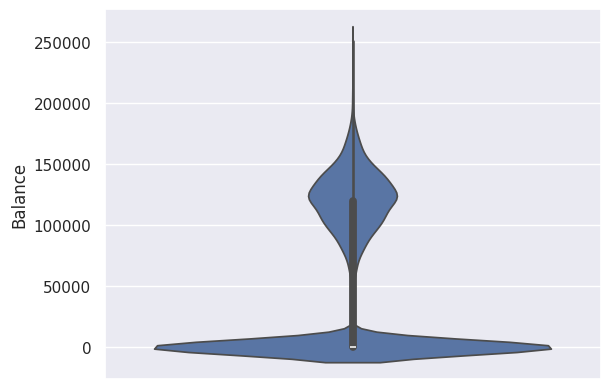

In [ ]:
sns.violinplot(test_df, y='Balance')

In [ ]:
test_df1 = pd.get_dummies(test_df, columns=['Geography', 'Gender'])

In [ ]:
test_df1

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Sur_te,Geography_France,Geography_Germany,Geography_Spain,Gender_Female,Gender_Male
0,586,23.0,2,0.00,2,0.0,1.0,160976.75,0.188082,True,False,False,True,False
1,683,46.0,2,0.00,1,1.0,0.0,72549.27,0.232389,True,False,False,True,False
2,656,34.0,7,0.00,2,1.0,0.0,138882.09,0.175633,True,False,False,True,False
3,681,36.0,8,0.00,1,1.0,0.0,113931.57,0.187215,True,False,False,False,True
4,752,38.0,10,121263.62,1,1.0,0.0,139431.00,0.229268,False,True,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
110018,570,29.0,7,116099.82,1,1.0,1.0,148087.62,0.161011,False,False,True,False,True
110019,575,36.0,4,178032.53,1,1.0,1.0,42181.68,0.238355,True,False,False,True,False
110020,712,31.0,2,0.00,2,1.0,0.0,16287.38,0.271059,True,False,False,False,True
110021,709,32.0,3,0.00,1,1.0,1.0,158816.58,0.256275,True,False,False,True,False


# **Model Training**

## 1. Logistic Regression

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [ ]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [ ]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(X_train,y_train)

LogisticRegression()

In [ ]:
y_predict_training = lr.predict(X_test)

In [ ]:
from sklearn.metrics import accuracy_score
acc = accuracy_score(y_test,y_predict_training)
print(f'Accuracy score for Logistic Regression: {acc}')

Accuracy score for Logistic Regression: 0.8405349164575555


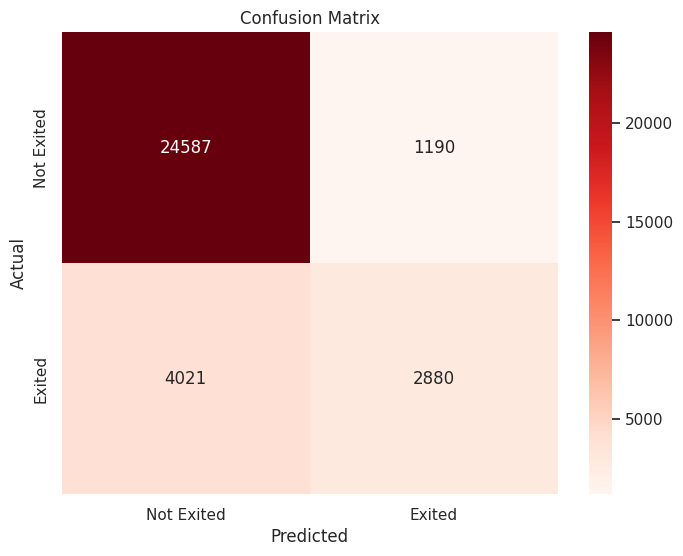

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_predict_training)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Reds', xticklabels=['Not Exited', 'Exited'], yticklabels=['Not Exited', 'Exited'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_predict_training))

              precision    recall  f1-score   support

           0       0.86      0.95      0.90     25777
           1       0.71      0.42      0.53      6901

    accuracy                           0.84     32678
   macro avg       0.78      0.69      0.71     32678
weighted avg       0.83      0.84      0.82     32678



## LR using PCA

# **Random Forest**

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(max_depth=10)
rf.fit(X_train,y_train)

RandomForestClassifier(max_depth=10)

In [ ]:
y_predict_training = rf.predict(X_test)
acc_score = accuracy_score(y_test,y_predict_training)
print(f'Accuracy score for Random Forest: {acc_score}')

Accuracy score for Random Forest: 0.863883958626599


[Text(0.5465353260869565, 0.9545454545454546, 'x[9] <= -0.145\ngini = 0.334\nsamples = 82588\nvalue = [103026, 27684]'),
 Text(0.3143196816770186, 0.8636363636363636, 'x[3] <= 0.172\ngini = 0.399\nsamples = 35305\nvalue = [40736.0, 15439.0]'),
 Text(0.4304275038819876, 0.9090909090909092, 'True  '),
 Text(0.15567983307453417, 0.7727272727272727, 'x[13] <= -0.129\ngini = 0.409\nsamples = 19502\nvalue = [22116, 8881]'),
 Text(0.07509219720496894, 0.6818181818181818, 'x[5] <= -0.104\ngini = 0.462\nsamples = 8851\nvalue = [8998, 5115]'),
 Text(0.04017857142857143, 0.5909090909090909, 'x[1] <= 1.175\ngini = 0.499\nsamples = 4837\nvalue = [3709.0, 4005.0]'),
 Text(0.021933229813664596, 0.5, 'x[8] <= 1.104\ngini = 0.498\nsamples = 4271\nvalue = [3184, 3594]'),
 Text(0.011451863354037268, 0.4090909090909091, 'x[2] <= 0.494\ngini = 0.499\nsamples = 3535\nvalue = [2704, 2929]'),
 Text(0.006211180124223602, 0.3181818181818182, 'x[7] <= 0.005\ngini = 0.455\nsamples = 2092\nvalue = [2181, 1171]'),


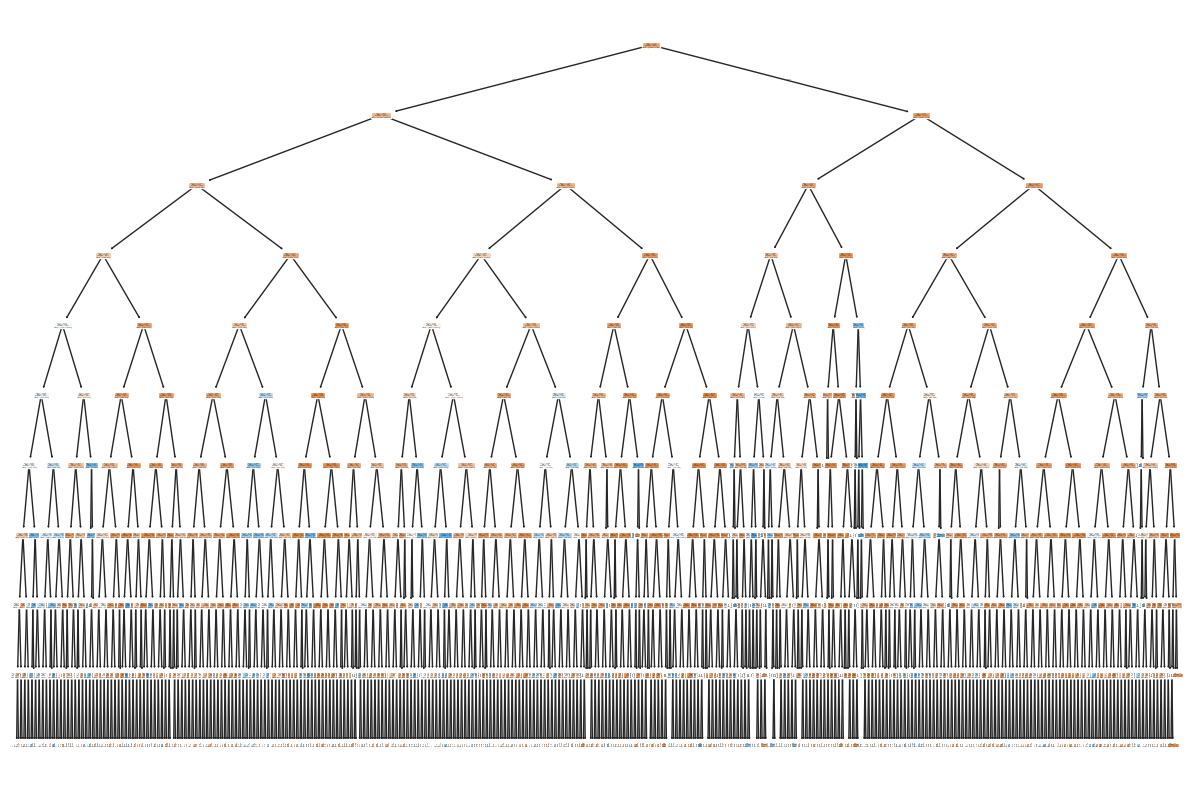

In [ ]:
from sklearn import tree
plt.figure(figsize=(15,10))
tree.plot_tree(rf.estimators_[0],filled=True)

## Random forest on PCA

# **3. Neural Network**

In [ ]:
import tensorflow as tf
import keras
from keras.models import Sequential
from keras.layers import Dense, Input, Dropout, BatchNormalization

In [ ]:
from keras.regularizers import l2

model = Sequential()
model.add(Input(shape=(15,)))

# First layer with L2 and BatchNorm
model.add(Dense(15, activation='relu', kernel_regularizer=l2(0.001)))
model.add(BatchNormalization())

# Second layer
model.add(Dense(7, activation='relu', kernel_regularizer=l2(0.001)))
model.add(BatchNormalization())

# Third layer
model.add(Dense(6, activation='relu', kernel_regularizer=l2(0.001)))
model.add(BatchNormalization())

# Output layer
model.add(Dense(1, activation='sigmoid'))

In [ ]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [ ]:
history = model.fit(X_train, y_train,epochs=100,batch_size=100,validation_split=0.33,validation_data=(X_test,y_test))

Epoch 1/100
1308/1308 ━━━━━━━━━━━━━━━━━━━━ 9s 4ms/step - accuracy: 0.7289 - loss: 0.6065 - val_accuracy: 0.7888 - val_loss: 0.5326
Epoch 2/100
1308/1308 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.7884 - loss: 0.5175 - val_accuracy: 0.7888 - val_loss: 0.7237
Epoch 3/100
1308/1308 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.7865 - loss: 0.5164 - val_accuracy: 0.7888 - val_loss: 0.5916
Epoch 4/100
1308/1308 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.7874 - loss: 0.5135 - val_accuracy: 0.7888 - val_loss: 0.5807
Epoch 5/100
1308/1308 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.7867 - loss: 0.5137 - val_accuracy: 0.7888 - val_loss: 0.5216
Epoch 6/100
1308/1308 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.7882 - loss: 0.5105 - val_accuracy: 0.7888 - val_loss: 0.5220
Epoch 7/100
1308/1308 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.7889 - loss: 0.5092 - val_accuracy: 0.5835 - val_loss: 0.7029
Epoch 8/100
1308/1308 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.7877 - loss: 0

In [ ]:
loss, accuracy = model.evaluate(X_test,y_test)
print(f'Loss: {loss}')
print(f'Accuracy: {accuracy}')

1022/1022 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.7887 - loss: 0.5081
Loss: 0.5080595016479492
Accuracy: 0.7888181805610657


1022/1022 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step


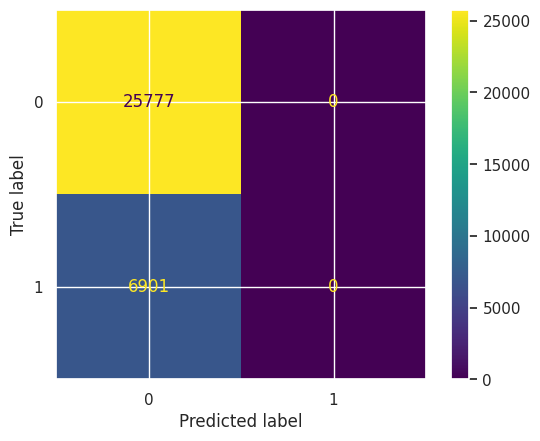

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
y_pred_NN = model.predict(X_test)
y_pred_NN = (y_pred_NN > 0.5)
cm = confusion_matrix(y_test, y_pred_NN)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()

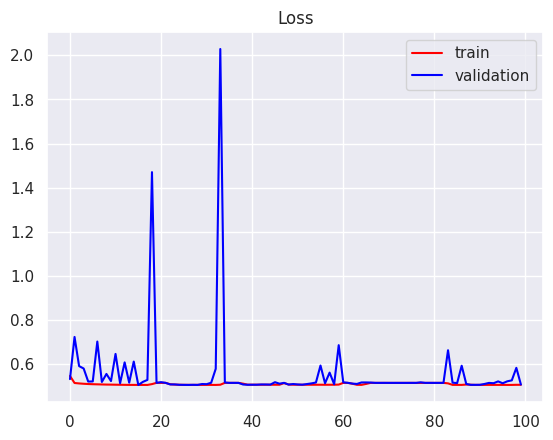

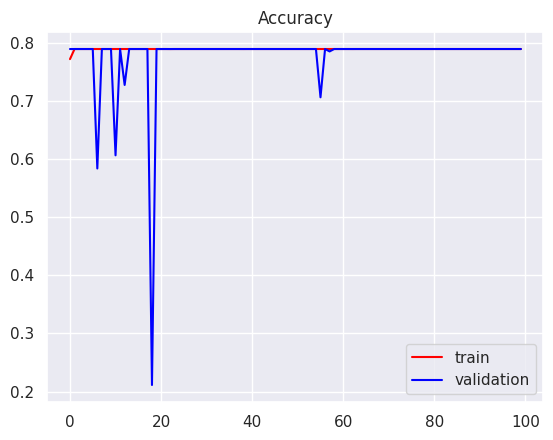

In [ ]:
# plotting accuracy and loss

# Loss
plt.title('Loss')
plt.plot(history.history['loss'],color='red',label='train') # traning data loss
plt.plot(history.history['val_loss'],color='blue',label='validation') # validation loss
plt.legend()
plt.show()

# Accuracy
plt.title('Accuracy')
plt.plot(history.history['accuracy'],color='red',label='train') # traning data accuracy
plt.plot(history.history['val_accuracy'],color='blue',label='validation') # validation accuracy
plt.legend()
plt.show()

# **Boosting**

Accuracy score for CatBoost: 0.8542750474325234


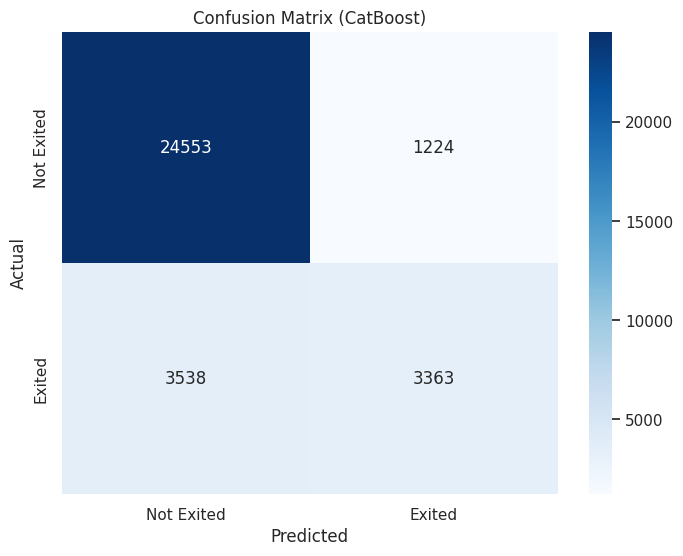

              precision    recall  f1-score   support

           0       0.87      0.95      0.91     25777
           1       0.73      0.49      0.59      6901

    accuracy                           0.85     32678
   macro avg       0.80      0.72      0.75     32678
weighted avg       0.84      0.85      0.84     32678



In [ ]:
import matplotlib.pyplot as plt
!pip install catboost
from catboost import CatBoostClassifier

# 4. CatBoost
# Convert boolean columns to int for CatBoost
X_train_cat = X_train.astype(int)
X_test_cat = X_test.astype(int)

catboost = CatBoostClassifier(iterations=100, random_state=42, verbose=0)
catboost.fit(X_train_cat, y_train)
y_predict_catboost = catboost.predict(X_test_cat)

acc_score_catboost = accuracy_score(y_test, y_predict_catboost)
print(f'Accuracy score for CatBoost: {acc_score_catboost}')

cm_catboost = confusion_matrix(y_test, y_predict_catboost)

plt.figure(figsize=(8, 6))
sns.heatmap(cm_catboost, annot=True, fmt='d', cmap='Blues', xticklabels=['Not Exited', 'Exited'], yticklabels=['Not Exited', 'Exited'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix (CatBoost)')
plt.show()

print(classification_report(y_test, y_predict_catboost))


Accuracy score for XGBoost: 0.8713201542322051


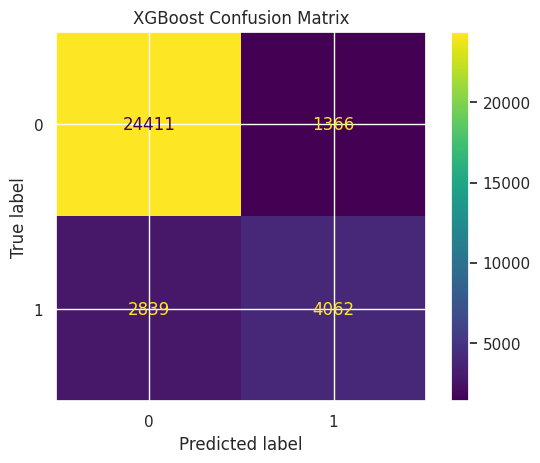

              precision    recall  f1-score   support

           0       0.90      0.95      0.92     25777
           1       0.75      0.59      0.66      6901

    accuracy                           0.87     32678
   macro avg       0.82      0.77      0.79     32678
weighted avg       0.86      0.87      0.87     32678



In [ ]:
import matplotlib.pyplot as plt
!pip install xgboost
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay

import xgboost as xgb

# Initialize the XGBoost classifier
xgb_model = xgb.XGBClassifier(objective='binary:logistic', random_state=42)

# Train the model on the training data
xgb_model.fit(X_train, y_train)

# Make predictions on the test data
y_pred_xgb = xgb_model.predict(X_test)

# You can now evaluate the performance of the XGBoost model using metrics like accuracy, precision, recall, F1-score, etc.
# For example, to get the accuracy:
accuracy_xgb = accuracy_score(y_test, y_pred_xgb)
print(f'Accuracy score for XGBoost: {accuracy_xgb}')

# To display the confusion matrix:
cm_xgb = confusion_matrix(y_test, y_pred_xgb)

disp_xgb = ConfusionMatrixDisplay(confusion_matrix=cm_xgb)
disp_xgb.plot()
plt.title('XGBoost Confusion Matrix')
plt.show()

# To print the classification report:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred_xgb))

In [ ]:
import pandas as pd
# Make predictions on the test data (the actual test.csv data)
# First, preprocess the test_df1 (which is the preprocessed test.csv)
# Need to apply the same scaling as applied to the training data
X_test_processed = sc.transform(test_df1)

# Make predictions using the trained XGBoost model
y_pred_xgb_test_data = xgb_model.predict(X_test_processed)

# Create a DataFrame with 'id' from the original test DataFrame and the predictions
submission_df = pd.DataFrame({'id': test['id'], 'Exited': y_pred_xgb_test_data})

# Save the DataFrame to a CSV file
submission_df.to_csv('submission.csv', index=False)

print("Submission file created successfully!")
print(submission_df.head())


Submission file created successfully!
       id  Exited
0  165034       0
1  165035       1
2  165036       0
3  165037       0
4  165038       0
